In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd

In [59]:
X = pd.read_csv("/Users/sura/churnguard-api/data/processed/X.csv")
y = pd.read_csv("/Users/sura/churnguard-api/data/processed/y.csv")

In [60]:

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=y
)


In [61]:
print(X.shape)
print(y.shape)
X.head()

(7043, 41)
(7043, 1)


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,CLTV,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,2,1,1,53,108,3239,...,1,0,0,1,0,0,0,0,0,1
1,0,0,0,1,2,1,1,70,151,2701,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,1,8,1,1,99,820,5372,...,0,0,1,1,0,0,0,0,1,0
3,0,0,1,1,28,1,1,104,3046,5003,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,1,49,1,1,103,5036,5340,...,0,0,1,1,0,0,1,0,0,0


In [62]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

Churn Value
0              0.734564
1              0.265436
Name: proportion, dtype: float64

In [63]:
model = LogisticRegression(class_weight='balanced',max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [64]:
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.50).astype(int)


print("Accuracy:" , accuracy_score(y_test,y_pred))
print("Roc AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.7452093683463449
Roc AUC Score: 0.8491358598775478


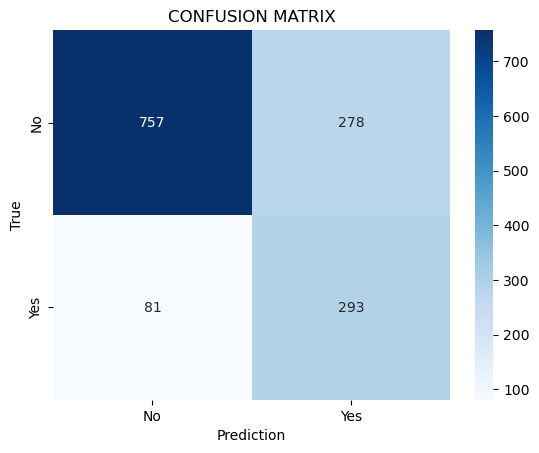

In [65]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
import matplotlib.pyplot as plt
plt.title("CONFUSION MATRIX")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.75      0.76      1409



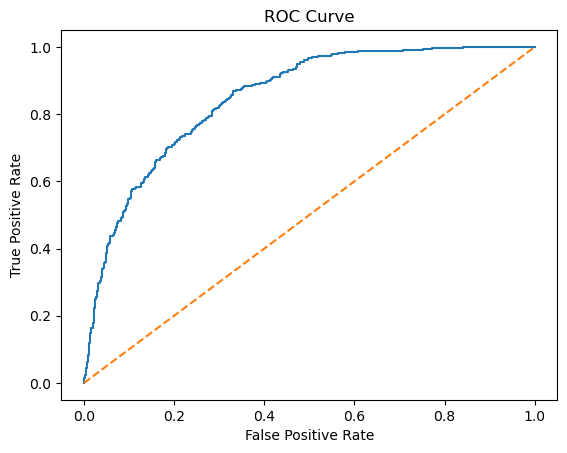

In [67]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [83]:
import sys
from pathlib import Path

BASE_DIR = Path().resolve().parent  
sys.path.append(str(BASE_DIR / "src"))

from src.predict import predict_churn  

In [90]:
import pandas as pd
from pathlib import Path
import importlib.util

# Mutlak proje root: notebooks'un bir üstü
PROJECT_ROOT = Path.cwd().parent  # /Users/sura/churnguard-api

# SRC dizini
SRC_DIR = PROJECT_ROOT / "src"

# train.py import
TRAIN_PATH = SRC_DIR / "train.py"
spec_train = importlib.util.spec_from_file_location("train", str(TRAIN_PATH))
train = importlib.util.module_from_spec(spec_train)
spec_train.loader.exec_module(train)

# predict.py import
PREDICT_PATH = SRC_DIR / "predict.py"
spec_predict = importlib.util.spec_from_file_location("predict", str(PREDICT_PATH))
predict = importlib.util.module_from_spec(spec_predict)
spec_predict.loader.exec_module(predict)

# Modeli eğit
train.train_model()

# Test verisi
X_test = pd.read_csv(PROJECT_ROOT / "data/processed/X.csv")
probs, preds = predict.predict_churn(X_test)

print("Probs:", probs[:10])
print("Preds:", preds[:10])


Probs: [0.46933217 0.75202868 0.83379177 0.62443746 0.47649088 0.35739683
 0.90696805 0.40631635 0.63646934 0.78920517]
Preds: [0 1 1 1 0 0 1 0 1 1]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
import pandas as pd
from pathlib import Path
import importlib.util

# Proje root dizini
PROJECT_ROOT = Path.cwd().parent
SRC_DIR = PROJECT_ROOT / "src"

# train.py import
TRAIN_PATH = SRC_DIR / "train.py"
spec_train = importlib.util.spec_from_file_location("train", str(TRAIN_PATH))
train = importlib.util.module_from_spec(spec_train)
spec_train.loader.exec_module(train)

# predict.py import
PREDICT_PATH = SRC_DIR / "predict.py"
spec_predict = importlib.util.spec_from_file_location("predict", str(PREDICT_PATH))
predict = importlib.util.module_from_spec(spec_predict)
spec_predict.loader.exec_module(predict)

# Modeli eğit
model, scaler = train.train_model()

# Test verisi
X_test = pd.read_csv(PROJECT_ROOT / "data/processed/X.csv")
probs, preds = predict.predict_churn(X_test)

print("Probs:", probs[:10])
print("Preds:", preds[:10])


Model ve scaler kaydedildi: /Users/sura/churnguard-api/models/logistic_model.pkl
Probs: [0.57660538 0.57975108 0.6771916  0.54434375 0.30216535 0.52277381
 0.8852555  0.45131189 0.46957765 0.83212838]
Preds: [1 1 1 1 0 1 1 0 0 1]
